In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from utils import *

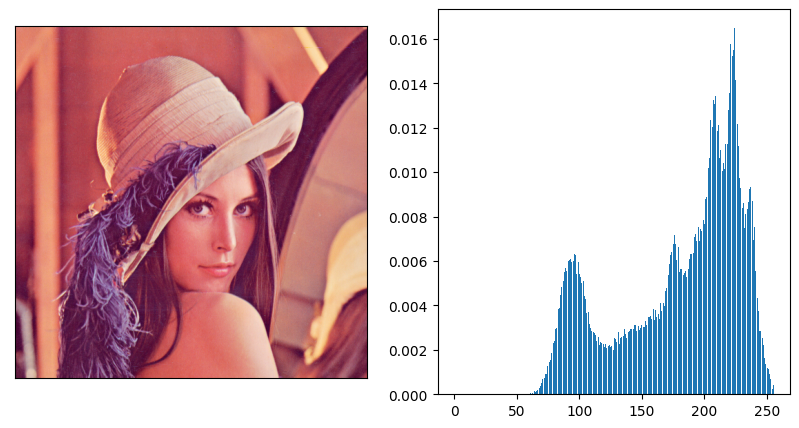

In [2]:
img = cv2.imread("./imgs/Lenna.png")[..., ::-1]

hist = get_hist_multiple_channel(img)

show_histogram([hist[0]], img)

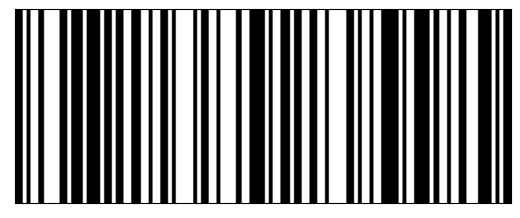

In [3]:
barcode = cv2.imread('./imgs/barcode.jpg', cv2.IMREAD_GRAYSCALE)
barcode = cv2.resize(barcode, (256, 100))
barcode[barcode>=128] = 255
barcode[barcode<128] = 0

plt.imshow(barcode, cmap='gray')
plt.xticks(())
plt.yticks(())
plt.show()

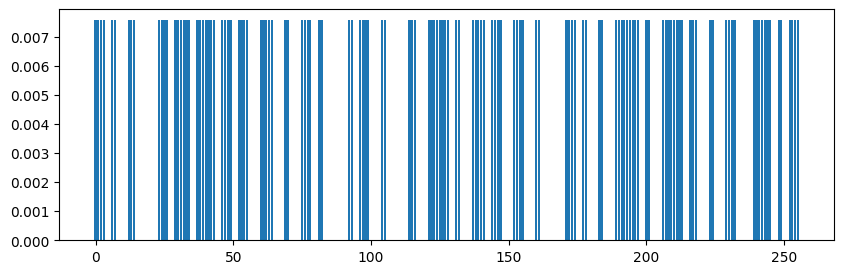

In [4]:
barcode_bin = 255-barcode[0]
barhist = barcode_bin / 255 
sumbar = sum(barhist)
barhist = barhist / sumbar
show_histogram([barhist], figsize=(10, 3))

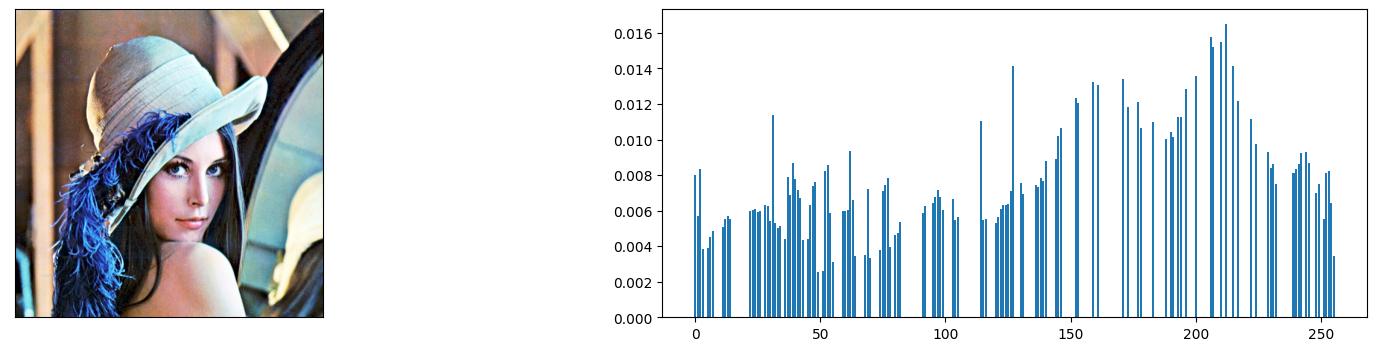

In [5]:
_, new_img = specialize_hists([barhist, barhist, barhist], hist, img)
new_hist = get_hist_multiple_channel(new_img)

show_histogram([new_hist[0]], new_img, figsize=(20, 4))

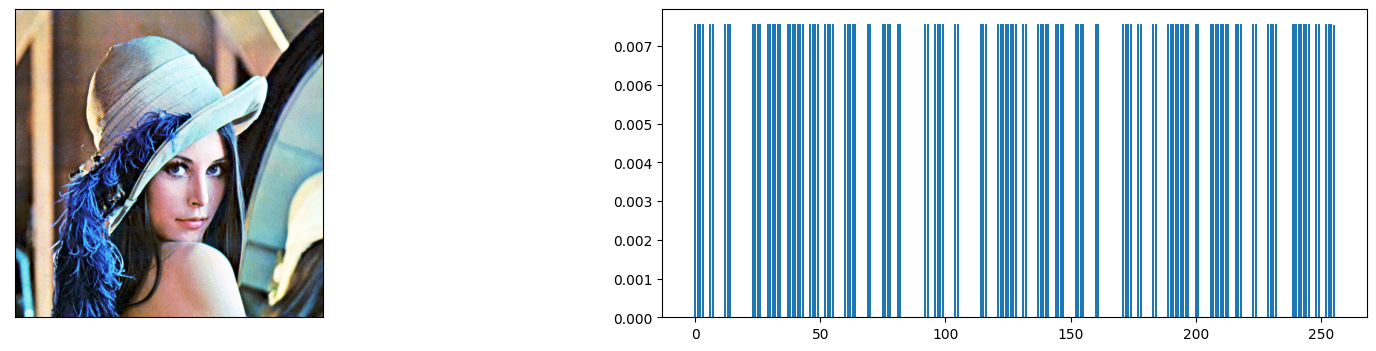

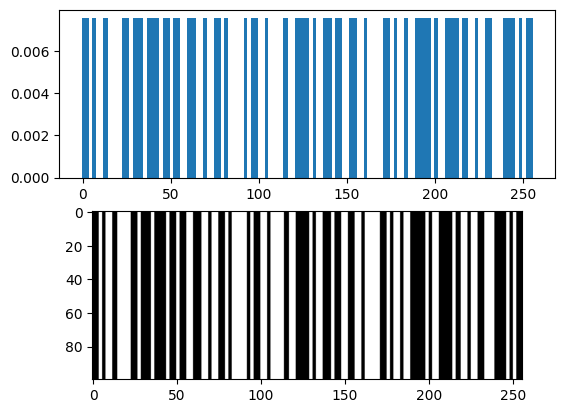

In [6]:
modified_img = exact_specialize_hists_multiple_channel([barhist, barhist, barhist], new_img)
modified_hist = get_hist_multiple_channel(modified_img)

show_histogram([modified_hist[0]], modified_img, figsize=(20, 4))
plt.figure()
plt.subplot(2, 1, 1)
plt.bar(range(256), modified_hist[0], width=1)
plt.subplot(2, 1, 2)
plt.imshow(barcode, cmap='gray')
plt.show()